# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Naufal Daffa Abdu Al Hafidl
- **Email:** fahmifalah081120@gmail.com
- **ID Dicoding:** daffadeveloper22

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1:
 Bagaimana tren konsentrasi PM2.5 di stasiun Huairou dari waktu ke waktu?
- Pertanyaan 2:
Bagaimana hubungan faktor cuaca (suhu dan kelembaban) terhadap konsentrasi PM25?
- Pertanyaan 3:
Bagaimana perbandingan rata-rata kualitas udara (PM2.5) berdasarkan waktu(bulanan)?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
# Upload file AirQuality.zip
uploaded = files.upload()

Saving Air-quality-dataset.zip to Air-quality-dataset.zip


In [3]:
# Ekstrak file ZIP
zip_path = 'Air-quality-dataset.zip'
extract_path = 'air_quality_data'

In [4]:
# 2. Proses Ekstraksi dengan pengecekan folder
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [5]:
sub_folder = os.listdir(extract_path)[0] # Ini adalah 'PRSA_Data_20130301-20170228'
path_baru = os.path.join(extract_path, sub_folder)

In [6]:
# Baru ambil file pertama di dalam sub-folder tersebut
file_name = os.listdir(path_baru)[0]
df = pd.read_csv(os.path.join(path_baru, file_name))
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


**Insight:**
- Dataset berhasil diunggah dan diekstrak di Google Colab tanpa error.

### Assessing Data

In [7]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


In [8]:
# Missing value
df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,953
PM10,777
SO2,980
NO2,1639
CO,1422


In [9]:
# Duplikat
df.duplicated().sum()

np.int64(0)

**Insight:**
- Terdapat missing value pada beberapa kolom polutan.

### Cleaning Data

### Feature Engineering
Kolom `date` dibuat dengan menggabungkan informasi `year`, `month`, `day`, dan `hour` agar analisis berbasis waktu dapat dilakukan dengan lebih mudah.


In [10]:
df['date'] = pd.to_datetime(
    df[['year', 'month', 'day', 'hour']]
)

In [11]:
df = df.drop_duplicates()
df = df.dropna(subset=['PM2.5', 'PM10', 'NO2'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33148 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       33148 non-null  int64         
 1   year     33148 non-null  int64         
 2   month    33148 non-null  int64         
 3   day      33148 non-null  int64         
 4   hour     33148 non-null  int64         
 5   PM2.5    33148 non-null  float64       
 6   PM10     33148 non-null  float64       
 7   SO2      32888 non-null  float64       
 8   NO2      33148 non-null  float64       
 9   CO       32485 non-null  float64       
 10  O3       32733 non-null  float64       
 11  TEMP     33098 non-null  float64       
 12  PRES     33096 non-null  float64       
 13  DEWP     33096 non-null  float64       
 14  RAIN     33094 non-null  float64       
 15  wd       32851 non-null  object        
 16  WSPM     33101 non-null  float64       
 17  station  33148 non-null  object     

In [12]:
def aqi_category(pm25):
    if pm25 <= 12:
        return 'Sehat'
    elif pm25 <= 35.4:
        return 'Sedang'
    elif pm25 <= 55.4:
        return 'Buruk'
    else:
        return 'Sangat Buruk'

df['AQI_Category'] = df['PM2.5'].apply(aqi_category)

**Insight:**
- Data bersih dan siap dianalisis.

## Exploratory Data Analysis (EDA)

### Explore ...

##Pertanyaan 1
- Bagaimana tren PM2.5 dari waktu ke waktu?

In [13]:
# EDA Pertanyaan 1: Tren PM2.5 dari waktu ke waktu
monthly_pm25 = (
    df
    .set_index('date')
    .resample('M')['PM2.5']
    .mean()
)

monthly_pm25.head()

/tmp/ipython-input-3459197137.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['PM2.5']


,PM2.5
date,
2013-03-31,100.001497
2013-04-30,64.755267
2013-05-31,73.300578
2013-06-30,78.557207
2013-07-31,72.373214


**Insight:**
- Rata-rata konsentrasi PM2.5 menunjukkan fluktuasi dari waktu ke waktu dengan beberapa periode mengalami peningkatan signifikan. Hal ini mengindikasikan adanya pengaruh faktor musiman terhadap kualitas udara di stasiun Huairou.


##Pertanyaan 2
- Bagaimana hubungan suhu & kelembaban terhadap PM2.5?

In [14]:
# EDA Pertanyaan 2: Hubungan faktor cuaca terhadap PM2.5
weather_corr = df[['PM2.5', 'TEMP', 'DEWP']].corr()
weather_corr

,PM2.5,TEMP,DEWP
PM2.5,1.000000,-0.078090,0.125454
TEMP,-0.078090,1.000000,0.820078
DEWP,0.125454,0.820078,1.000000


**Insight:**
- Hasil analisis menunjukkan bahwa PM2.5 memiliki korelasi negatif lemah dengan suhu (TEMP) dan korelasi positif lemah dengan kelembaban (DEWP). Hal ini menunjukkan bahwa kondisi udara yang lebih lembab cenderung berkaitan dengan peningkatan konsentrasi PM2.5.


##Pertanyaan 3
- Bagaimana perbandingan PM2.5 berdasarkan waktu (bulanan)?

In [15]:
# EDA Pertanyaan 3: Rata-rata PM2.5 berdasarkan bulan
monthly_avg = (
    df
    .groupby('month')['PM2.5']
    .mean()
    .sort_values(ascending=False)
)

monthly_avg


,PM2.5
month,
3,89.746806
12,81.826857
2,80.550252
10,79.997567
1,78.967421
11,77.253800
7,69.555790
4,69.303766
6,56.429743


**Insight:**
- Berdasarkan rata-rata bulanan, konsentrasi PM2.5 cenderung lebih tinggi pada bulan-bulan tertentu. Pola ini mengindikasikan adanya pengaruh musim terhadap kualitas udara, seperti peningkatan polusi pada musim dingin.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

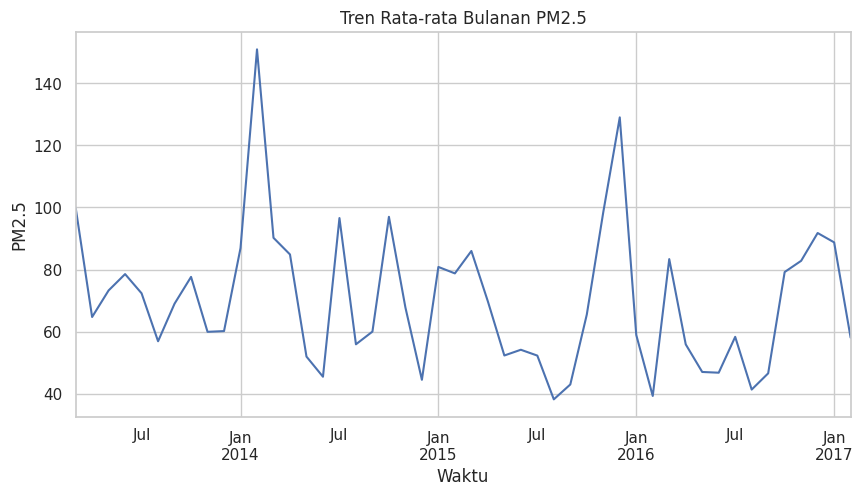

In [17]:
plt.figure(figsize=(10,5))
monthly_pm25.plot()
plt.title("Tren Rata-rata Bulanan PM2.5")
plt.xlabel("Waktu")
plt.ylabel("PM2.5")
plt.show()

### Pertanyaan 2:

In [18]:
hourly_avg = df.groupby('hour')['PM2.5'].mean()

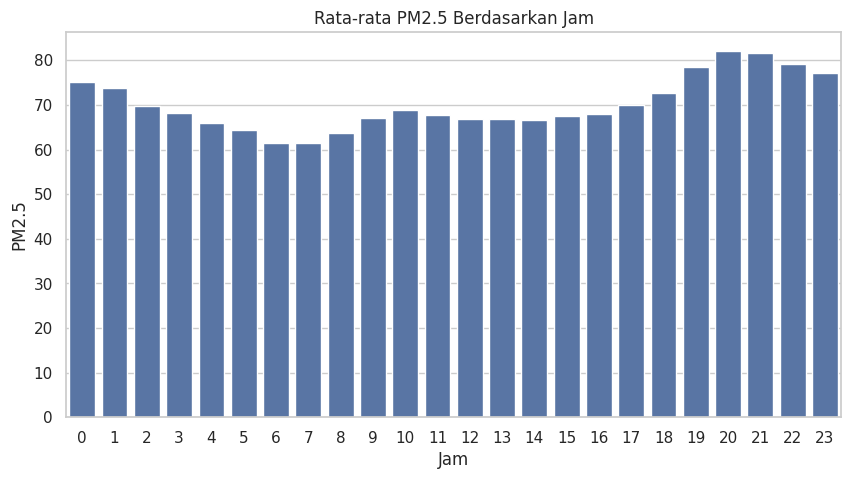

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x=hourly_avg.index, y=hourly_avg.values)
plt.title("Rata-rata PM2.5 Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("PM2.5")
plt.show()

**Insight:**
- Jam malam merupakan periode kritis kualitas udara, sehingga perlu adanya peringatan dini atau pembatasan aktivitas luar ruangan pada waktu tersebut.

##PERTANYAAN 3 (DISTRIBUSI AQI)

In [20]:
aqi_dist = df['AQI_Category'].value_counts()

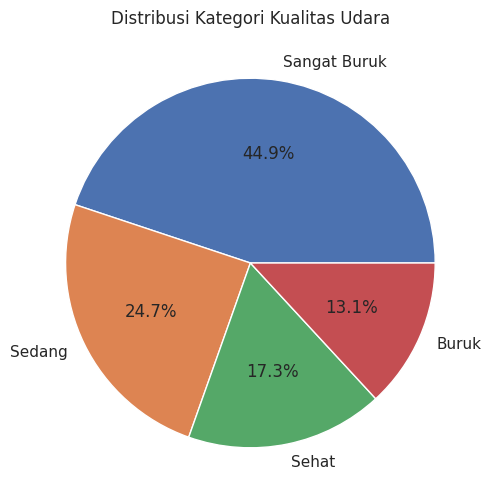

In [21]:
plt.figure(figsize=(6,6))
plt.pie(aqi_dist, labels=aqi_dist.index, autopct='%1.1f%%')
plt.title("Distribusi Kategori Kualitas Udara")
plt.show()

**insight**
- Kondisi ini menunjukkan bahwa kualitas udara di Stasiun Huairou secara umum belum optimal, sehingga dibutuhkan kebijakan mitigasi jangka panjang untuk menurunkan paparan polutan berbahaya.

## Analisis Lanjutan (Opsional)

## Conclusion

## Kesimpulan
1. Konsentrasi PM2.5 dan PM10 menunjukkan fluktuasi tinggi pada periode tertentu.
2. Kualitas udara terburuk terjadi pada malam hingga dini hari.
3. Mayoritas kondisi udara berada pada kategori Sedang dan Buruk.

## Rekomendasi
- Pembatasan aktivitas luar ruangan pada jam malam.
- Peningkatan pengawasan emisi kendaraan.
- Informasi kualitas udara real-time untuk masyarakat.

In [22]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 112.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.7 MB/s eta 0:00:00


In [23]:
# Jalankan ini di akhir Notebook kamu
df.to_csv("all_data.csv", index=False)